In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [ ]:
# loading the dataset.
(xtrain, ytrain), (xtest, ytest) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
len(xtrain[49000:])

1000

In [ ]:
##
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
## printing labels.
print(ytrain)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
## total number of labels and their frequencies.
pd.Series(ytrain.ravel()).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [ ]:
## see documentation for labels.
## Url: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
## let's rescale all pixel values to [0,1] range.

# convert from integers to floats
# normalize to range 0-1
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [ ]:
# to for one hot encoding.
from tensorflow.keras.utils import to_categorical

In [ ]:
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)

In [ ]:
xtrain[0].shape

(32, 32, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu',input_shape=xtrain[0].shape),
    tf.keras.layers.Conv2D(filters=30,kernel_size=(9,9), strides=(1,1), activation='relu' ),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=20, kernel_size=(7,7), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=15, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32, 32, 512)       2048      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 30)        1244190   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 20)        29420     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)       

In [ ]:
## compile model.
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest), verbose=1)

Epoch 1/20
1563/1563 [==============================] - 46s 21ms/step - loss: 1.8015 - accuracy: 0.3452 - val_loss: 1.5256 - val_accuracy: 0.4451
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5412 - accuracy: 0.4462 - val_loss: 1.5609 - val_accuracy: 0.4523
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4521 - accuracy: 0.4801 - val_loss: 1.5982 - val_accuracy: 0.4427
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3981 - accuracy: 0.4981 - val_loss: 1.3882 - val_accuracy: 0.5020
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3635 - accuracy: 0.5169 - val_loss: 1.4786 - val_accuracy: 0.4882
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3455 - accuracy: 0.5223 - val_loss: 1.3767 - val_accuracy: 0.5256
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3256 - accuracy: 0.5324 - val_loss: 1.3179 -

In [ ]:
# evaluate model
__, acc = model.evaluate(xtest, ytest, verbose=0)
print("accuracy: ", acc*100)

accuracy:  49.0200012922287


In [ ]:
model.predict(xtest[:1])

array([[0.00652166, 0.00223199, 0.10193419, 0.49841455, 0.00962115,
        0.27033076, 0.07776599, 0.02341774, 0.00741062, 0.00235136]],
      dtype=float32)

In [ ]:
## saving the model

model.save('final_model.h5')

In [ ]:
from tensorflow.keras import models 

In [ ]:
# load model
loaded_model = models.load_model('/content/final_model.h5')

In [ ]:
# model.predict(testX[0])
# predict the class
result = model.predict(xtest[1:2])#, batch_size=None)

In [ ]:
xtest[1:2].shape

(1, 32, 32, 3)

In [ ]:
result    # probabilities associated with each class

array([[1.7871529e-01, 3.4539393e-01, 5.3646727e-03, 1.8909517e-03,
        8.4075163e-04, 2.5472013e-04, 4.3390595e-04, 4.3410333e-04,
        4.2338371e-01, 4.3287970e-02]], dtype=float32)

In [ ]:
np.argmax(result)  ## print the class of the instance.

8

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
xtest[1].shape

(32, 32, 3)

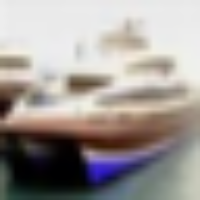

In [ ]:
## for visualizing images
cv2_imshow(cv2.resize((xtest[1]*255), (200,200)))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot diagnostic learning curves
def training_accuracy(history):
    plt.subplot(211)
    plt.title('Categorical Cross entropy loss')
    plt.plot(history.history['loss'], color='black', label='train')
    plt.plot(history.history['val_loss'], color='blue', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Epochs Vs Training accuracy')
    plt.plot(history.history['accuracy'], color='red', label='train')
    plt.plot(history.history['val_accuracy'], color='green', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')
    # pyplot.close()

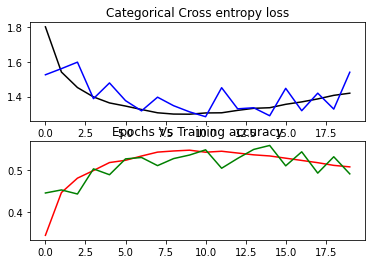

In [ ]:
training_accuracy(history)